In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Research Project Mango/Nawodya - Mango Plant/Mango Tree Stages/stages of a mango plant'

/content/drive/MyDrive/Research Project Mango/Nawodya - Mango Plant/Mango Tree Stages/stages of a mango plant


In [4]:
size=224

In [5]:
train_path = '/content/drive/MyDrive/Research Project Mango/Nawodya - Mango Plant/Mango Tree Stages/stages of a mango plant'
valid_path = '/content/drive/MyDrive/Research Project Mango/Nawodya - Mango Plant/Mango Tree Stages/stages of a mango plant'

In [6]:
inception = InceptionV3(input_shape=[size,size] + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob(train_path+'/*')

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,058,789 (84.15 MB)

 Trainable params: 256,005 (1000.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 36 images belonging to 5 classes.


In [15]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (size, size),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 36 images belonging to 5 classes.


In [16]:
steps_per_epoch = len(training_set)
validation_steps = len(test_set)

In [20]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=min(len(training_set), 5),
  validation_steps=min(len(test_set), 5)
)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 9s/step - accuracy: 0.9815 - loss: 0.0397 - val_accuracy: 1.0000 - val_loss: 1.8883e-04
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 7.8866e-06
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 9s/step - accuracy: 0.9815 - loss: 0.2288 - val_accuracy: 1.0000 - val_loss: 7.3180e-07
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 1.0000 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 1.3577e-07
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 8s/step - accuracy: 1.0000 - loss: 1.8322e-06 - val_accuracy: 1.0000 - val_loss: 5.29

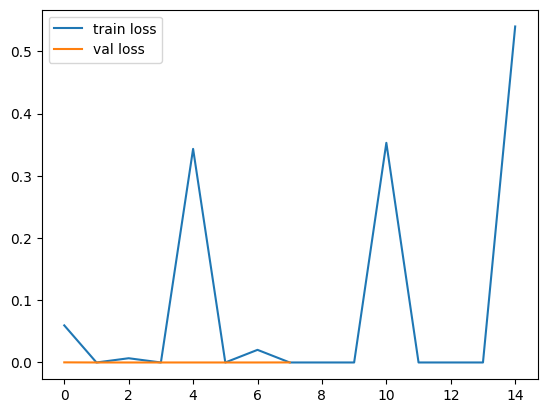

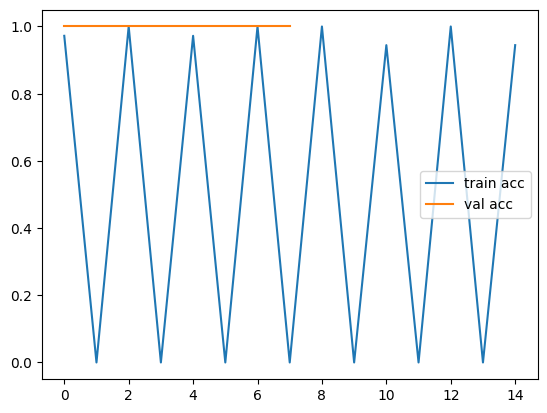

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model

model.save('sample_model.h5')

In [23]:
y_pred = model.predict(test_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step


In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
from tensorflow.keras.models import load_model

model=load_model('sample_model.h5')

In [27]:
img=image.load_img('/content/drive/MyDrive/Research Project Mango/Nawodya - Mango Plant/Mango Tree Stages/stages of a mango plant/Juvenile Stage 3/2.jpg',target_size=(size,size))

In [28]:
x=image.img_to_array(img)
x=x/255

In [29]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.22584334, 0.69022495, 0.00284911, 0.05802482, 0.0230578 ]],
      dtype=float32)

In [31]:
np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([1])

In [32]:
class_map = training_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [33]:
classes

['Fruiting Stage 5',
 'Juvenile Stage 3',
 'Mature Tree Stage 4',
 'Seed Germination 1',
 'Seedling Stage 2']

In [34]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    prob = prediction
    print(prob[0])

    index = np.argmax(prediction)
    confidence = prob[0][index]

    if confidence >= 0.9:
        plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='green')
        plt.imshow(img_array)
    else:
        plt.title("Not Detected", size=18, color='red')
        plt.imshow(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[1.0000000e+00 3.9278547e-34 4.3038305e-33 1.6229868e-30 0.0000000e+00]


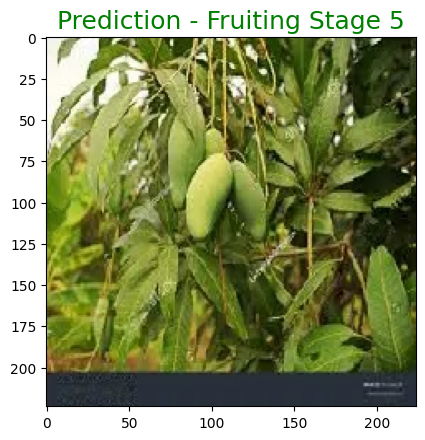

In [35]:
predict_image('/content/drive/MyDrive/Research Project Mango/Nawodya - Mango Plant/Mango Tree Stages/stages of a mango plant/Fruiting Stage 5/4.jpg', model)

Saving 4.png to 4.png
File uploaded: 4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
[3.3230353e-14 2.3126337e-14 1.0000000e+00 1.5849562e-21 2.7805545e-25]


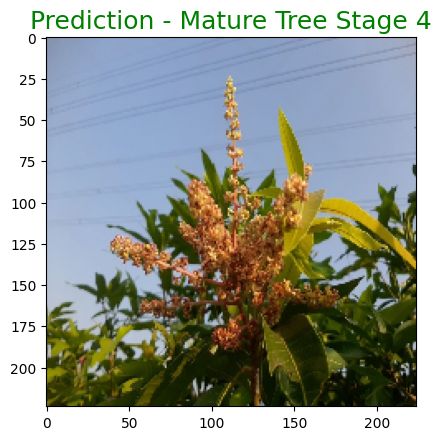

In [36]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'File uploaded: {filename}')
    predict_image(filename, model)